### 1. Entendendo o case

- O que são apontamentos e como funciona a dinâmica deles
- Qual foi o desafio proposto no Hackathon
- Bases disponíveis

In [ ]:
pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 MB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.1.3-cp39-cp39-linux_x86_64.whl size=12062342 sha256=24a49003fc4c1b06abc50b3c934211f4fec1bb532c7647e1590ae8d2c4494924
  Stored in directory: /root/.cache/pip/wheels/88/5f/33/d7b8943eba74fdfbd535c83cefcf366c25b0f9cb6424e763e7
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.10.1 requires matplotlib>=3.5.0, but you have matplotlib 3.1.3 which is incompatible.
mizani 0.8.1 requires matplotli

In [ ]:
pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 5.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### 2. Base de dados e tratamento

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import pycaret

from pycaret.classification import *

https://www.kaggle.com/competitions/titanic/data?select=train.csv

In [ ]:
df = pd.read_csv('train.csv', sep=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


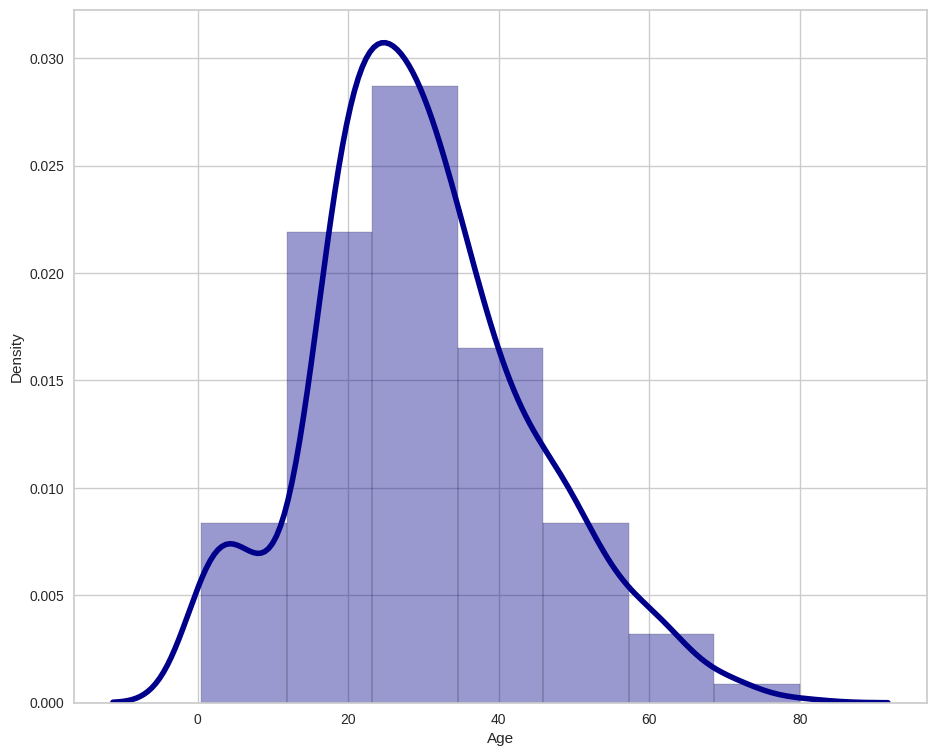

In [ ]:
plt.subplots(figsize=(11, 9))

sns.distplot(df['Age'], hist=True, bins=7, color='darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
plt.show()

In [ ]:
# Preencher valores nulos com a média

df['Age'].fillna(value=df['Age'].mean(), inplace=True)

In [ ]:
df['Cabin'] = df['Cabin'].astype(str).str[0]

### 3. Modelo

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,n,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,n,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,n,S


In [ ]:
categoricos = ['Pclass', 'Sex', 'Embarked', 'Cabin']

numericos = ['Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
cls = setup(df,  # Seu dataframe
            target='Survived',  # Variável target
            fold_shuffle=True,  # Para cross-validation
            categorical_features=categoricos,  # Define as variáveis categóricas
            numeric_features=numericos,  # Define as variáveis numéricas
            remove_multicollinearity=True,  # Remove as variáveis muito correlatas
            multicollinearity_threshold=0.7,  # O limite para a multicolinearidade
            fix_imbalance=True,  # Balanceia as variáveis target
            normalize=True)

,Description,Value
0,Session id,5857
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 9)"
4,Transformed data shape,"(1036, 21)"
5,Transformed train set shape,"(768, 21)"
6,Transformed test set shape,"(268, 21)"
7,Ordinal features,1
8,Numeric features,4
9,Categorical features,4


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8203,0.8475,0.7076,0.8086,0.7488,0.6106,0.6190,0.1690
lightgbm,Light Gradient Boosting Machine,0.7915,0.8446,0.7159,0.7349,0.7237,0.5566,0.5583,0.1670
ada,Ada Boost Classifier,0.7913,0.8223,0.7197,0.7361,0.7251,0.5573,0.5603,0.1570
ridge,Ridge Classifier,0.7898,0.0000,0.7243,0.7322,0.7241,0.5550,0.5593,0.0710
lda,Linear Discriminant Analysis,0.7898,0.8389,0.7243,0.7322,0.7241,0.5550,0.5593,0.1650
lr,Logistic Regression,0.7786,0.8391,0.7368,0.7049,0.7175,0.5361,0.5397,0.7610
rf,Random Forest Classifier,0.7610,0.8351,0.6652,0.6994,0.6807,0.4900,0.4915,0.2240
knn,K Neighbors Classifier,0.7561,0.7978,0.6614,0.6950,0.6741,0.4801,0.4836,0.1570
et,Extra Trees Classifier,0.7528,0.7901,0.6569,0.6957,0.6724,0.4745,0.4780,0.2510
dt,Decision Tree Classifier,0.7449,0.7361,0.6904,0.6705,0.6744,0.4662,0.4720,0.0900


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

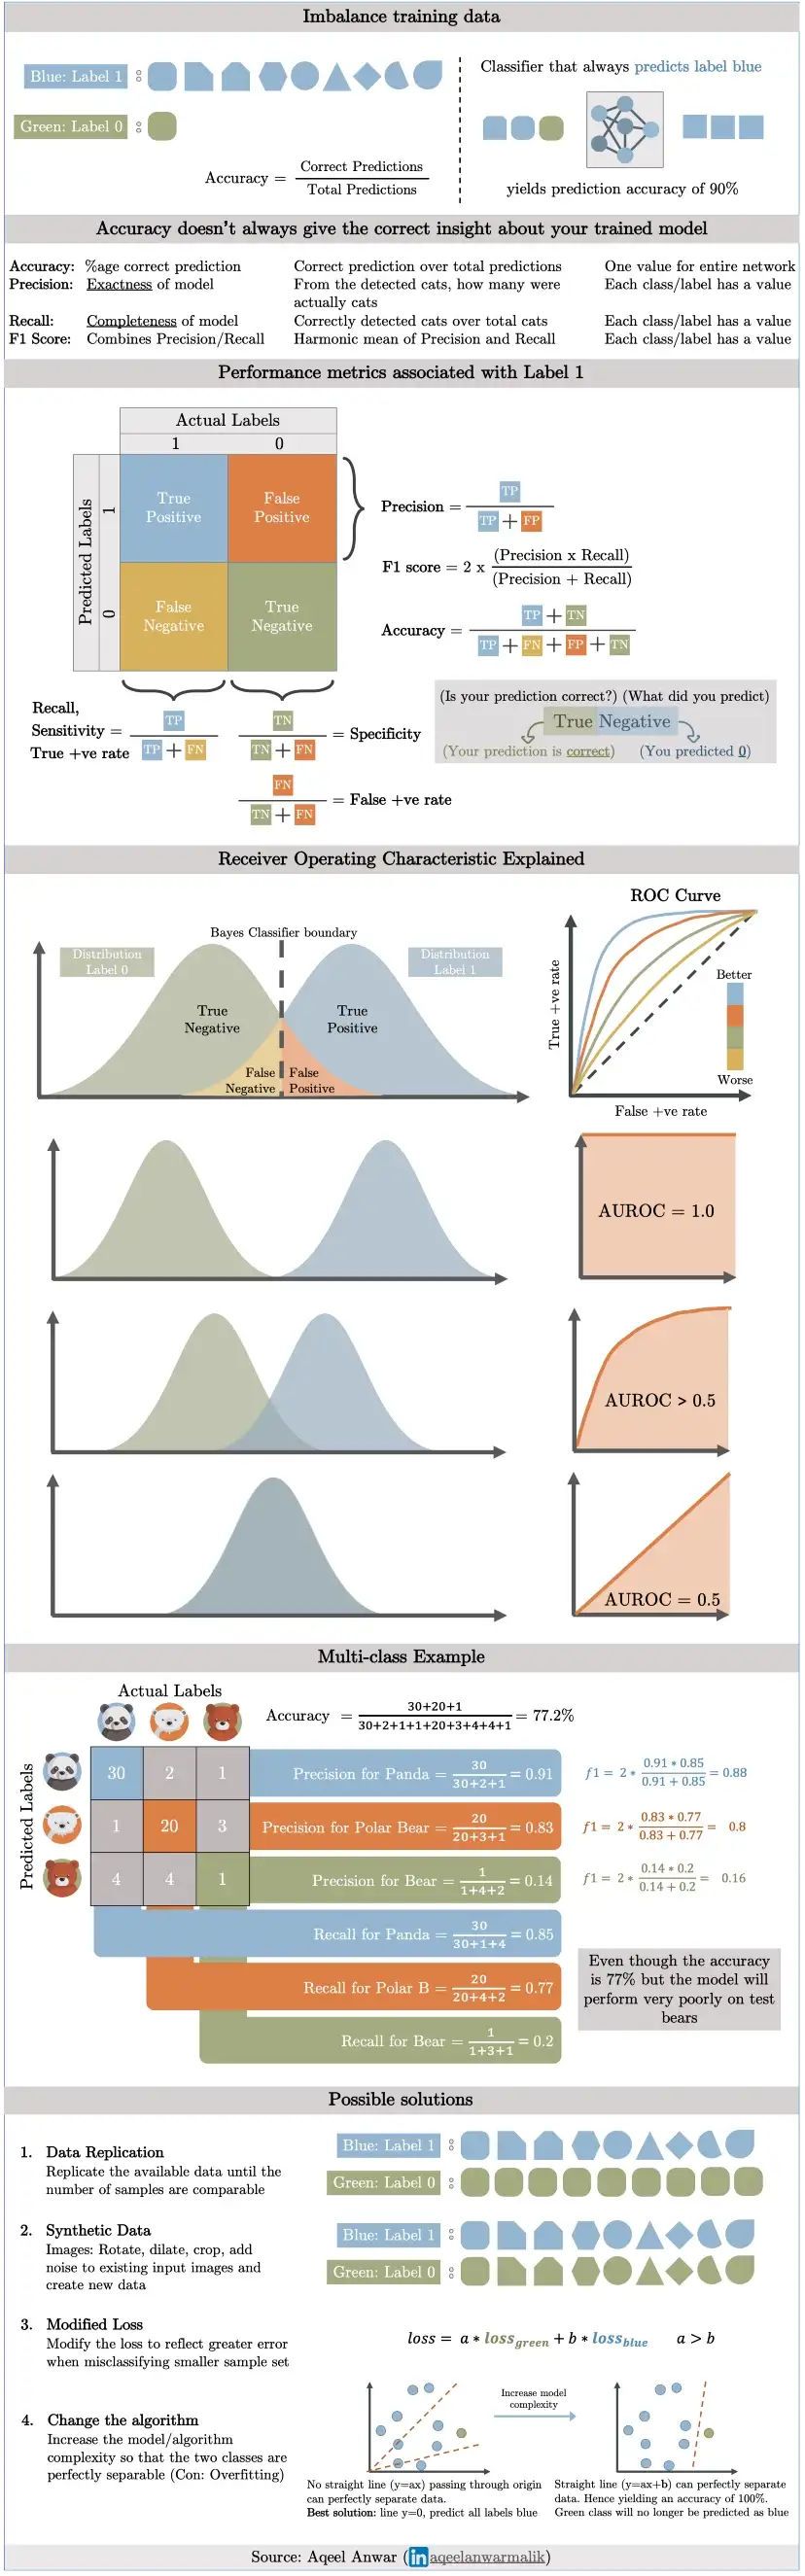

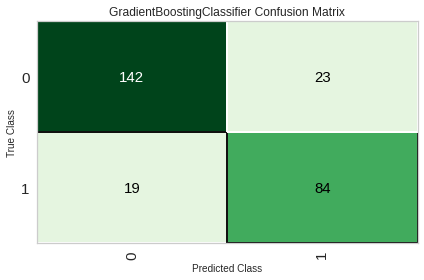

In [ ]:
plot_model(best, plot='confusion_matrix')

In [ ]:
model = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.8226,0.6250,0.8824,0.7317,0.6078,0.6277
1,0.8254,0.8339,0.6667,0.8421,0.7442,0.6144,0.6240
2,0.7937,0.8210,0.7083,0.7391,0.7234,0.5590,0.5593
3,0.8387,0.9008,0.8261,0.7600,0.7917,0.6605,0.6620
4,0.8226,0.8306,0.7083,0.8095,0.7556,0.6173,0.6207
5,0.7742,0.7889,0.5833,0.7778,0.6667,0.5011,0.5130
6,0.8387,0.9013,0.8333,0.7692,0.8000,0.6652,0.6667
7,0.8710,0.8997,0.8333,0.8333,0.8333,0.7281,0.7281
8,0.7903,0.8152,0.7083,0.7391,0.7234,0.5547,0.5550


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
model_tuned = tune_model(model, fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.8088,0.6667,0.8421,0.7442,0.6144,0.6240
1,0.8254,0.8189,0.6667,0.8421,0.7442,0.6144,0.6240
2,0.8254,0.8777,0.6667,0.8421,0.7442,0.6144,0.6240
3,0.7742,0.8657,0.6957,0.6957,0.6957,0.5162,0.5162
4,0.8387,0.8723,0.6667,0.8889,0.7619,0.6437,0.6589
5,0.8387,0.8289,0.7500,0.8182,0.7826,0.6548,0.6564
6,0.8387,0.9172,0.7917,0.7917,0.7917,0.6601,0.6601
7,0.8548,0.8772,0.7500,0.8571,0.8000,0.6869,0.6906
8,0.7581,0.7610,0.5833,0.7368,0.6512,0.4698,0.4773


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


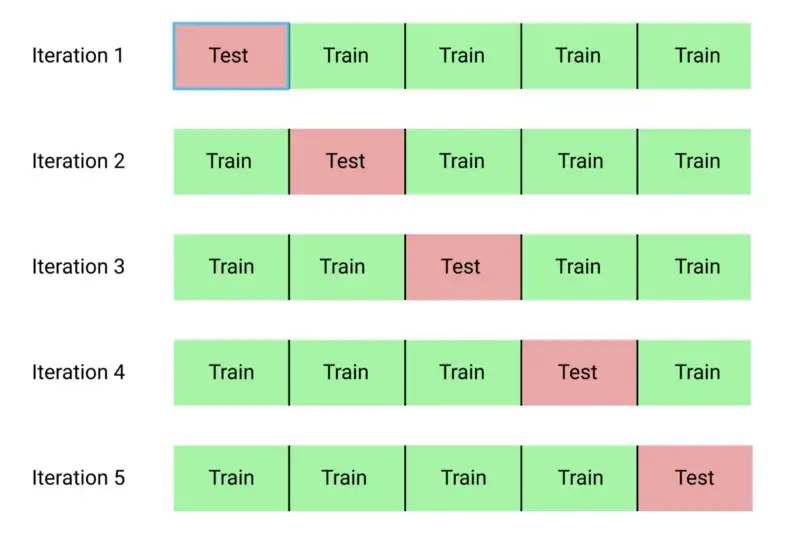

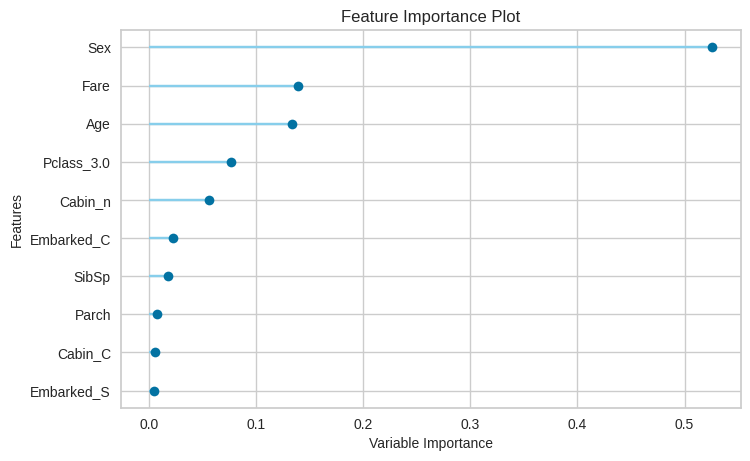

In [ ]:
plot_model(model_tuned, plot='feature')

In [ ]:
really_best = create_model(best, cross_validation=True, fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.8226,0.6250,0.8824,0.7317,0.6078,0.6277
1,0.8254,0.8339,0.6667,0.8421,0.7442,0.6144,0.6240
2,0.7937,0.8210,0.7083,0.7391,0.7234,0.5590,0.5593
3,0.8387,0.9008,0.8261,0.7600,0.7917,0.6605,0.6620
4,0.8226,0.8306,0.7083,0.8095,0.7556,0.6173,0.6207
5,0.7742,0.7889,0.5833,0.7778,0.6667,0.5011,0.5130
6,0.8387,0.9013,0.8333,0.7692,0.8000,0.6652,0.6667
7,0.8710,0.8997,0.8333,0.8333,0.8333,0.7281,0.7281
8,0.7903,0.8152,0.7083,0.7391,0.7234,0.5547,0.5550


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
evaluate_model(really_best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
test = pd.read_csv('test.csv', sep=',')
test.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
test['Cabin'] = test['Cabin'].astype(str).str[0]
test['Age'].fillna(value=test['Age'].mean(), inplace=True)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,n,Q
1,3,female,47.0,1,0,7.0000,n,S
2,2,male,62.0,0,0,9.6875,n,Q
3,3,male,27.0,0,0,8.6625,n,S
4,3,female,22.0,1,1,12.2875,n,S


In [ ]:
predicted = predict_model(model_tuned, data=test)
predicted

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,prediction_label,prediction_score
0,3,male,34.500000,0,0,7.829200,n,Q,0,0.8393
1,3,female,47.000000,1,0,7.000000,n,S,0,0.8925
2,2,male,62.000000,0,0,9.687500,n,Q,0,0.8311
3,3,male,27.000000,0,0,8.662500,n,S,0,0.6915
4,3,female,22.000000,1,1,12.287500,n,S,1,0.5656
...,...,...,...,...,...,...,...,...,...,...
413,3,male,30.272591,0,0,8.050000,n,S,0,0.8337
414,1,female,39.000000,0,0,108.900002,C,C,1,0.9259
415,3,male,38.500000,0,0,7.250000,n,S,0,0.9407
416,3,male,30.272591,0,0,8.050000,n,S,0,0.8337


- https://pycaret.readthedocs.io/en/stable/api/classification.html

- https://towardsdatascience.com/a-walk-through-imbalanced-classes-in-machine-learning-through-a-visual-cheat-sheet-974740b19094

- https://medium.com/@edubrazrabello/cross-validation-avaliando-seu-modelo-de-machine-learning-1fb70df15b78

- https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85

- https://www.datacamp.com/tutorial/guide-for-automating-ml-workflows-using-pycaret

- https://insaid.medium.com/a-complete-guide-to-pycaret-c07b1e51f698

- https://medium.com/ensina-ai/pycaret-a-biblioteca-de-aprendizagem-de-m%C3%A1quinas-para-quem-tem-prazo-1c5b09667763

- https://medium.com/data-hackers/otimizando-os-hiperpar%C3%A2metros-621de5e9be37

